# Avacado Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Here we can see that there is 18249 rows and 14 columns in the Avacado dataset.
Where the:
•Date - The date of the observation
•AveragePrice - the average price of a single avocado
•type - conventional or organic
•year - the year
•Region - the city or region of the observation
•Total Volume - Total number of avocados sold
•4046 - Total number of avocados with PLU 4046 sold
•4225 - Total number of avocados with PLU 4225 sold
•4770 - Total number of avocados with PLU 4770 sold

And we have to find the Region and Average price of the dataset. So lets beginthe data analysis.


In [4]:
df.shape

(18249, 14)

In [5]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Now we can understand that there is no null values are present in the dataset. And the data type of most of the column is float64 only region and unnamed are object. 

In [7]:
df.head(10)

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   
5           5  2015-11-22          1.26      55979.78  1184.27   48067.99   
6           6  2015-11-15          0.99      83453.76  1368.92   73672.72   
7           7  2015-11-08          0.98     109428.33   703.75  101815.36   
8           8  2015-11-01          1.02      99811.42  1022.15   87315.57   
9           9  2015-10-25          1.07      74338.76   842.40   64757.44   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   
5   43.61     6683.91     6556.47      127.44          0.0  conventional   
6   93.26     8318.86     8196.81      122.05          0.0  conventional   
7   80.00     6829.22     6266.85      562.37          0.0  conventional   
8   85.34    11388.36    11104.53      283.83          0.0  conventional   
9  113.00     8625.92     8061.47      564.45          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany  
5  2015  Albany  
6  2015  Albany  
7  2015  Albany  
8  2015  Albany  
9  2015  Albany

In [8]:
df.tail(10)

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18239           2  2018-03-11          1.56      22128.42  2162.67  3194.25   
18240           3  2018-03-04          1.54      17393.30  1832.24  1905.57   
18241           4  2018-02-25          1.57      18421.24  1974.26  2482.65   
18242           5  2018-02-18          1.56      17597.12  1892.05  1928.36   
18243           6  2018-02-11          1.57      15986.17  1924.28  1368.32   
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18239    8.93    16762.57    16510.32      252.25          0.0  organic  2018   
18240    0.00    13655.49    13401.93      253.56          0.0  organic  2018   
18241    0.00    13964.33    13698.27      266.06          0.0  organic  2018   
18242    0.00    13776.71    13553.53      223.18          0.0  organic  2018   
18243    0.00    12693.57    12437.35      256.22          0.0  organic  2018   
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18239  WestTexNewMexico  
18240  WestTexNewMexico  
18241  WestTexNewMexico  
18242  WestTexNewMexico  
18243  WestTexNewMexico  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [9]:
#Unnamed is unnecessary feature so we can remove that column.
df.drop('Unnamed: 0', axis = 1)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [10]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Clearly see that there is no null values are present in the data set. Now we can check for missing values.

In [11]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df['AveragePrice'].nunique()

259

In [13]:
df['region'].nunique()

54

In [14]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64

In [15]:
df.describe()

Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   17692.894652   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%    0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02       0.000000   
50%    1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03       0.000000   
75%    6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04     132.500000   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               year  
count  18249.000000  
mean    2016.147899  
std        0.939938  
min     2015.000000  
25%     2015.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000

In [16]:
df.AveragePrice.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

In [17]:
df.region.describe()

count      18249
unique        54
top       Albany
freq         338
Name: region, dtype: object

In [107]:
#Now we seperate categorical and continous features

Cont = ['Total Volume','4046' ,'4225' ,'4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
Cat = ['type', 'year','region']

conventional    9126
organic         9123
Name: type, dtype: int64

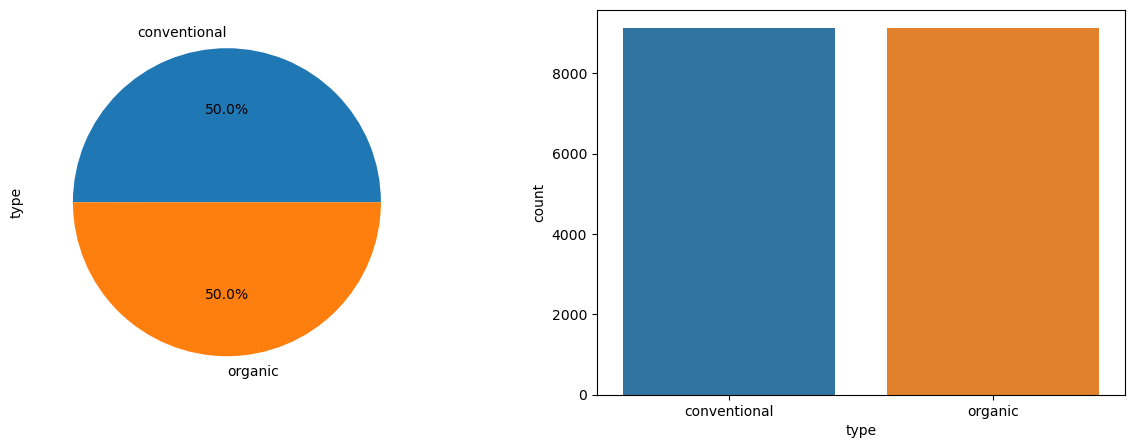

In [19]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['type'])
df['type'].value_counts()

The two type conventional and organic are almost same and balanced.

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

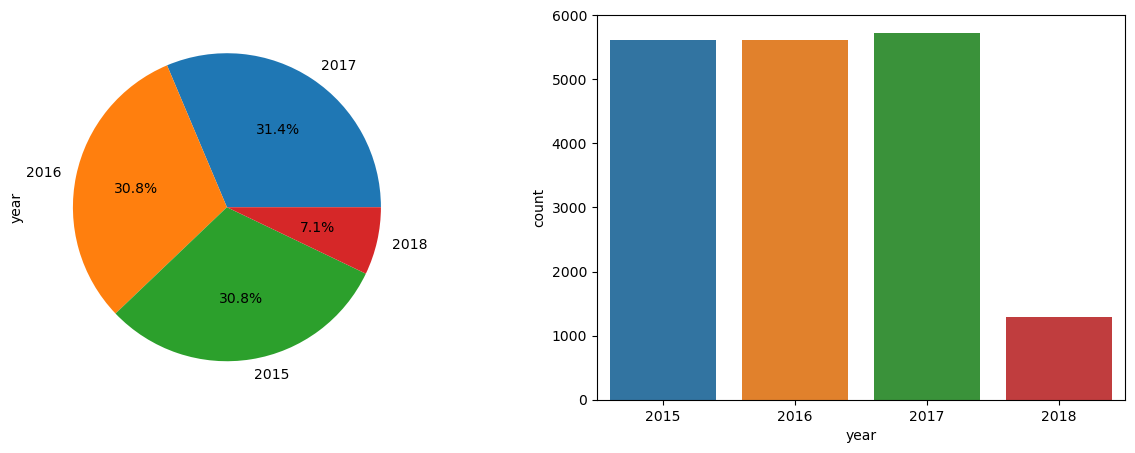

In [20]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
df['year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['year'])
df['year'].value_counts()

Most of the data is from 2017 followed by 2016 and 2015 respectively, while 2018 has the least data.

Total no. of region 54


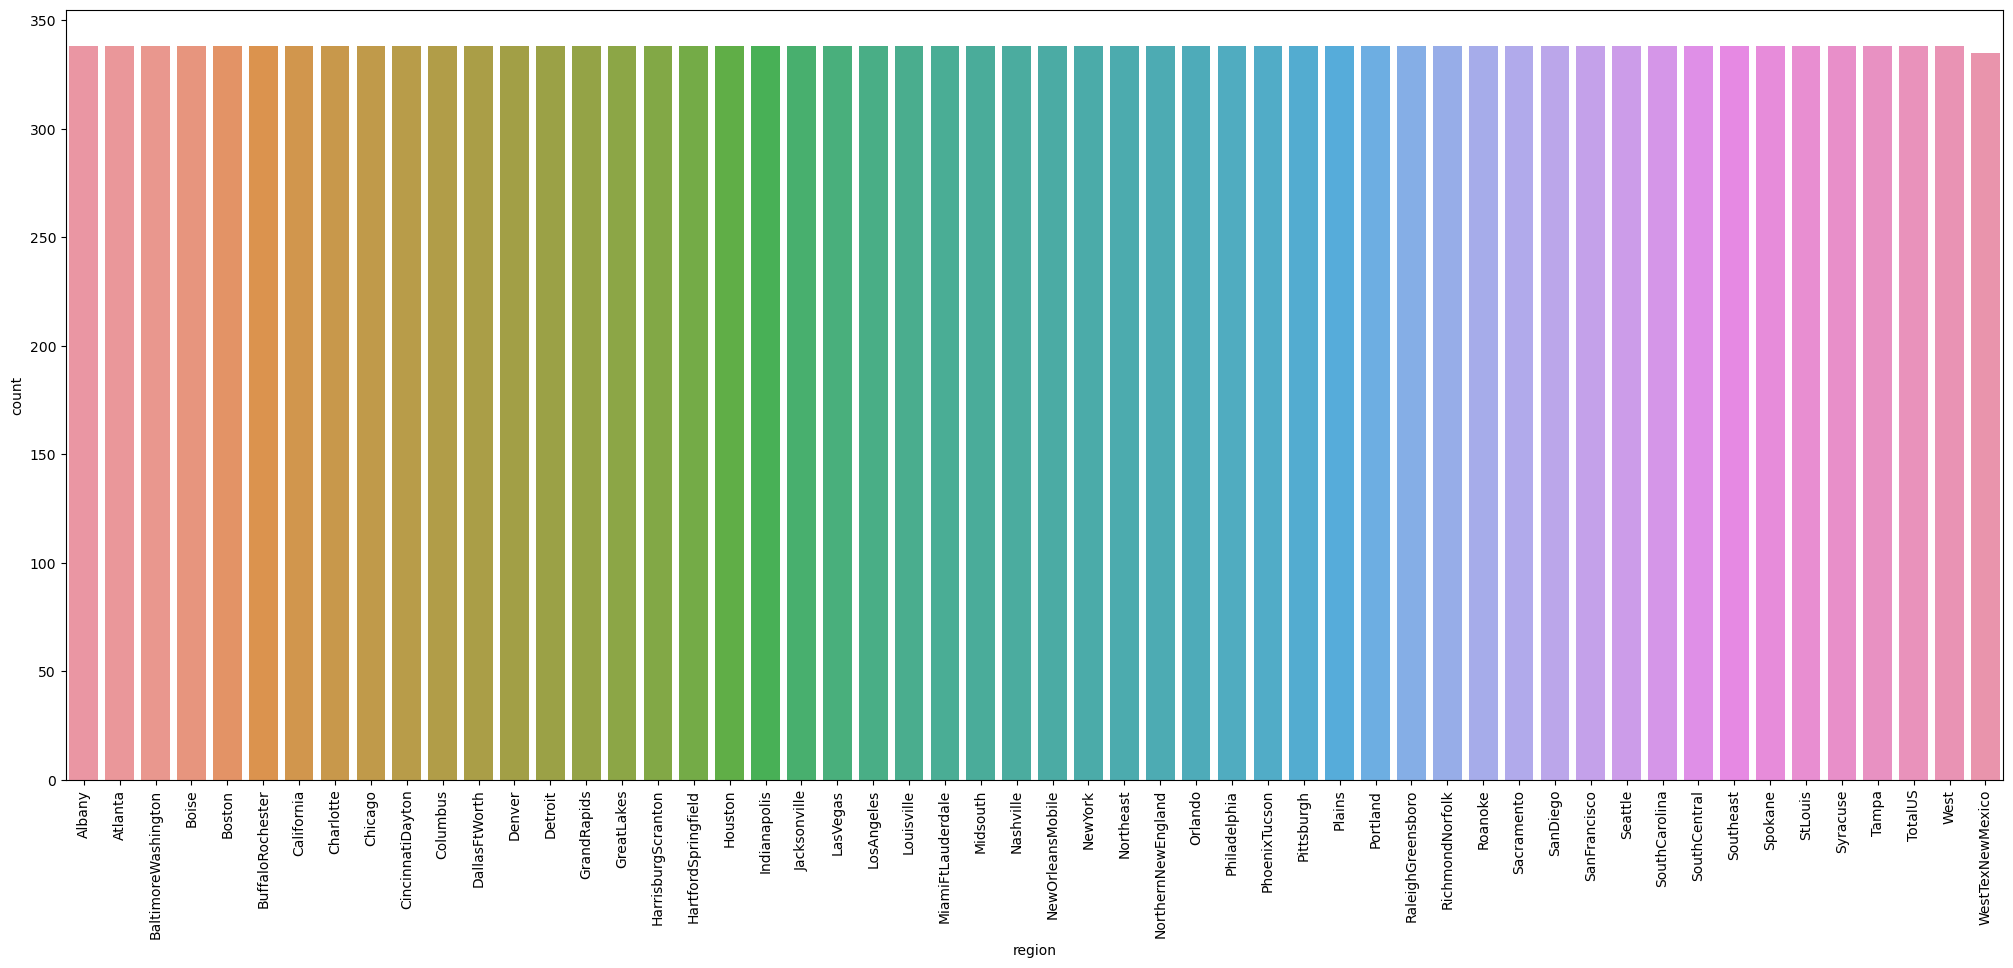

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(df['region'])
plt.xticks(rotation=90)
print('Total no. of region', df['region'].nunique())

There are 54 regions in total. All the region produces almost equal amounts of avocados except for west tex new mexico which has slightly less number.

Minimum 0.44
Maximum 3.25


<Figure size 800x600 with 0 Axes>

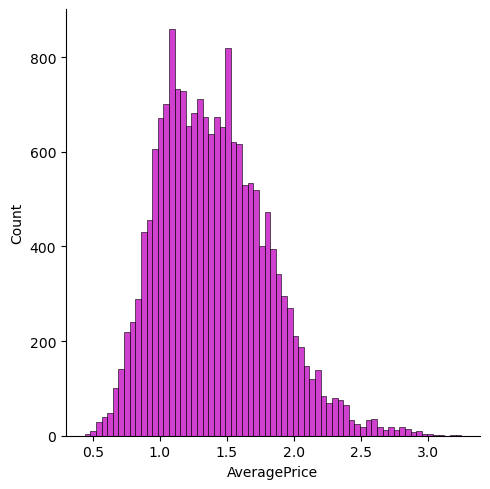

In [22]:
plt.figure(figsize=(8,6))
sns.displot(df['AveragePrice'], color = 'm', kde_kws = {'color': 'k'})
print('Minimum', df['AveragePrice'].min())
print('Maximum', df['AveragePrice'].max())

Average price of avacados little skewed, price ranging from 0.44 t0 3.25

Minimum 84.56
Maximum 62505646.52


<Figure size 800x600 with 0 Axes>

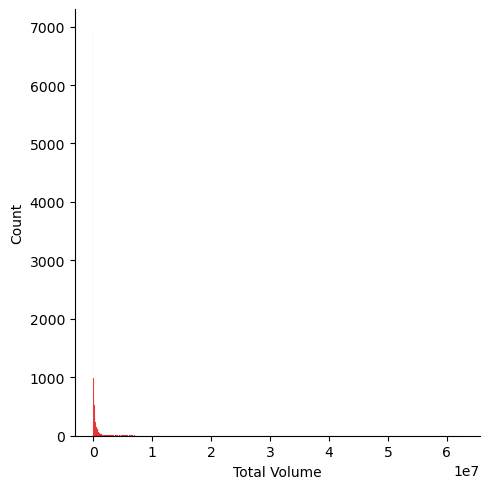

In [23]:
plt.figure(figsize=(8,6))
sns.displot(df['Total Volume'], color = 'r', kde_kws = {'color': 'k'})
print('Minimum', df['Total Volume'].min())
print('Maximum', df['Total Volume'].max())

Minimum 0.0
Maximum 22743616.17


<Figure size 800x600 with 0 Axes>

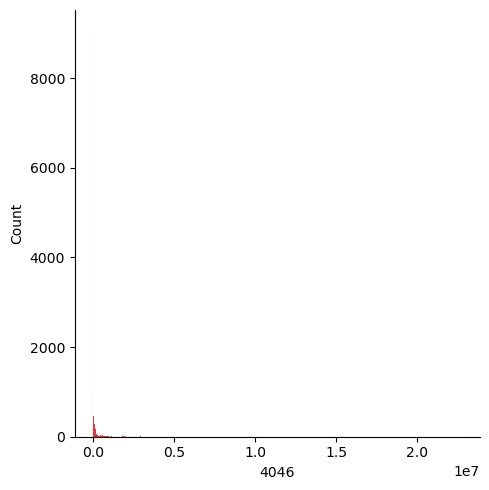

In [24]:
plt.figure(figsize=(8,6))
sns.displot(df['4046'], color = 'r', kde_kws = {'color': 'k'})
print('Minimum', df['4046'].min())
print('Maximum', df['4046'].max())

Avacados with Product look up code 4046 is mostly concentrated near the minimum whereas the range goes up to 22743616.17. Data is higly skewed to the right, which needs to be taken care of ahead.

Minimum 0.0
Maximum 2546439.11


<Figure size 800x600 with 0 Axes>

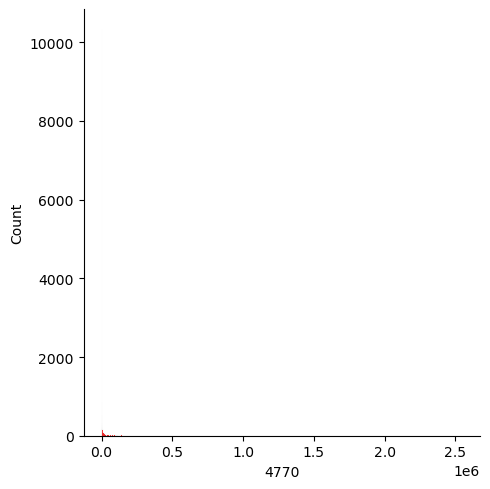

In [25]:
plt.figure(figsize=(8,6))
sns.displot(df['4770'], color = 'r', kde_kws = {'color': 'k'})
print('Minimum', df['4770'].min())
print('Maximum', df['4770'].max())

Avacados with Product look up code 4770 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 2546439.11 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.



Minimum 0.0
Maximum 20470572.61


<Figure size 800x600 with 0 Axes>

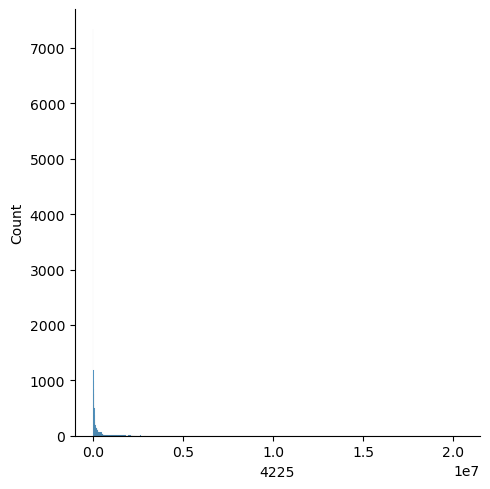

In [26]:
plt.figure(figsize=(8,6))
sns.displot(df['4225'])
print('Minimum', df['4225'].min())
print('Maximum', df['4225'].max())

Avacados with Product look up code 4225 is mostly concentrated near the minimum and the minimum equal to 0, whereas the range goes up to 20470572.61 as the maximum. Data is higly skewed to the right, which needs to be taken care of ahead in the data engineering process.

Minimum 0.0
Maximum 19373134.37


<Figure size 800x600 with 0 Axes>

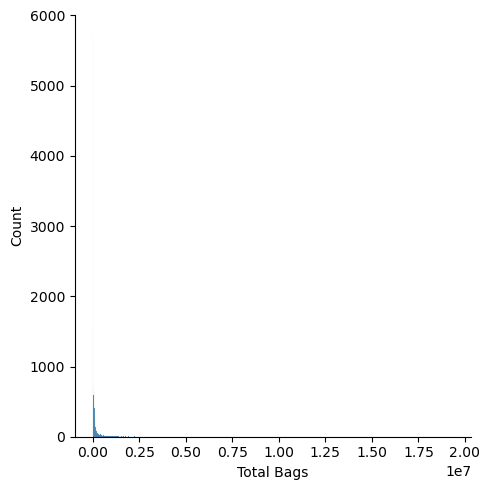

In [27]:
plt.figure(figsize=(8,6))
sns.displot(df['Total Bags'])
print('Minimum', df['Total Bags'].min())
print('Maximum', df['Total Bags'].max())

Total bags has most of its density near to its minimum value and goes up to a range of 19373134.37 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 5719096.61


<Figure size 800x600 with 0 Axes>

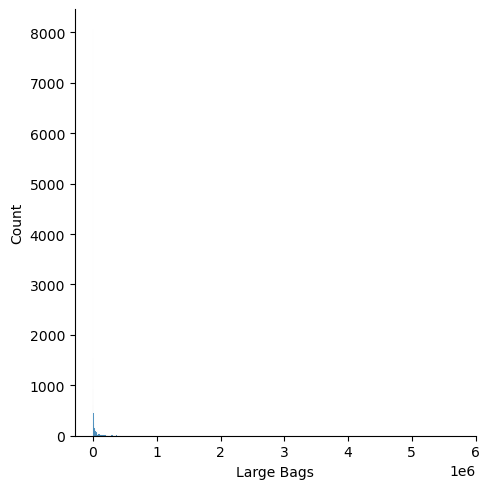

In [28]:
plt.figure(figsize=(8,6))
sns.displot(df['Large Bags'])
print('Minimum', df['Large Bags'].min())
print('Maximum', df['Large Bags'].max())

Large bags has most of its density near to its minimum value which is 0 and goes up to a range of 13384586.8 with its maximum value. Data is clearly skewed to the right.

Minimum 0.0
Maximum 551693.65


<Figure size 800x600 with 0 Axes>

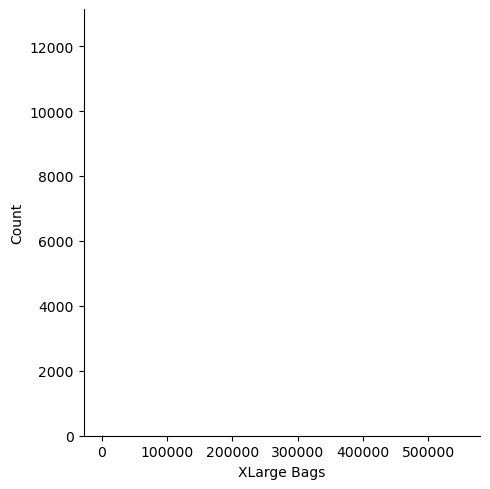

In [46]:
plt.figure(figsize=(8,6))
sns.displot(df['XLarge Bags'])
print('Minimum', df['XLarge Bags'].min())
print('Maximum', df['XLarge Bags'].max())

Xtra large bags are densely populated in the range 0 to 5000, whereas they are spread till values more than 5 lakh. Distribution of data is highly right skewed.

Minimum 0.0
Maximum 13384586.8


<Figure size 800x600 with 0 Axes>

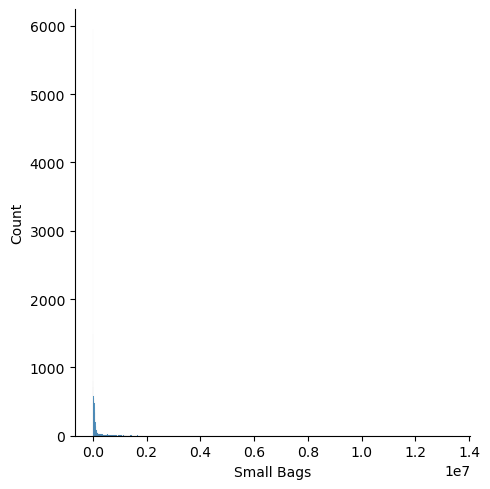

In [44]:
plt.figure(figsize=(8,6))
sns.displot(df['Small Bags'])
print('Minimum', df['Small Bags'].min())
print('Maximum', df['Small Bags'].max())

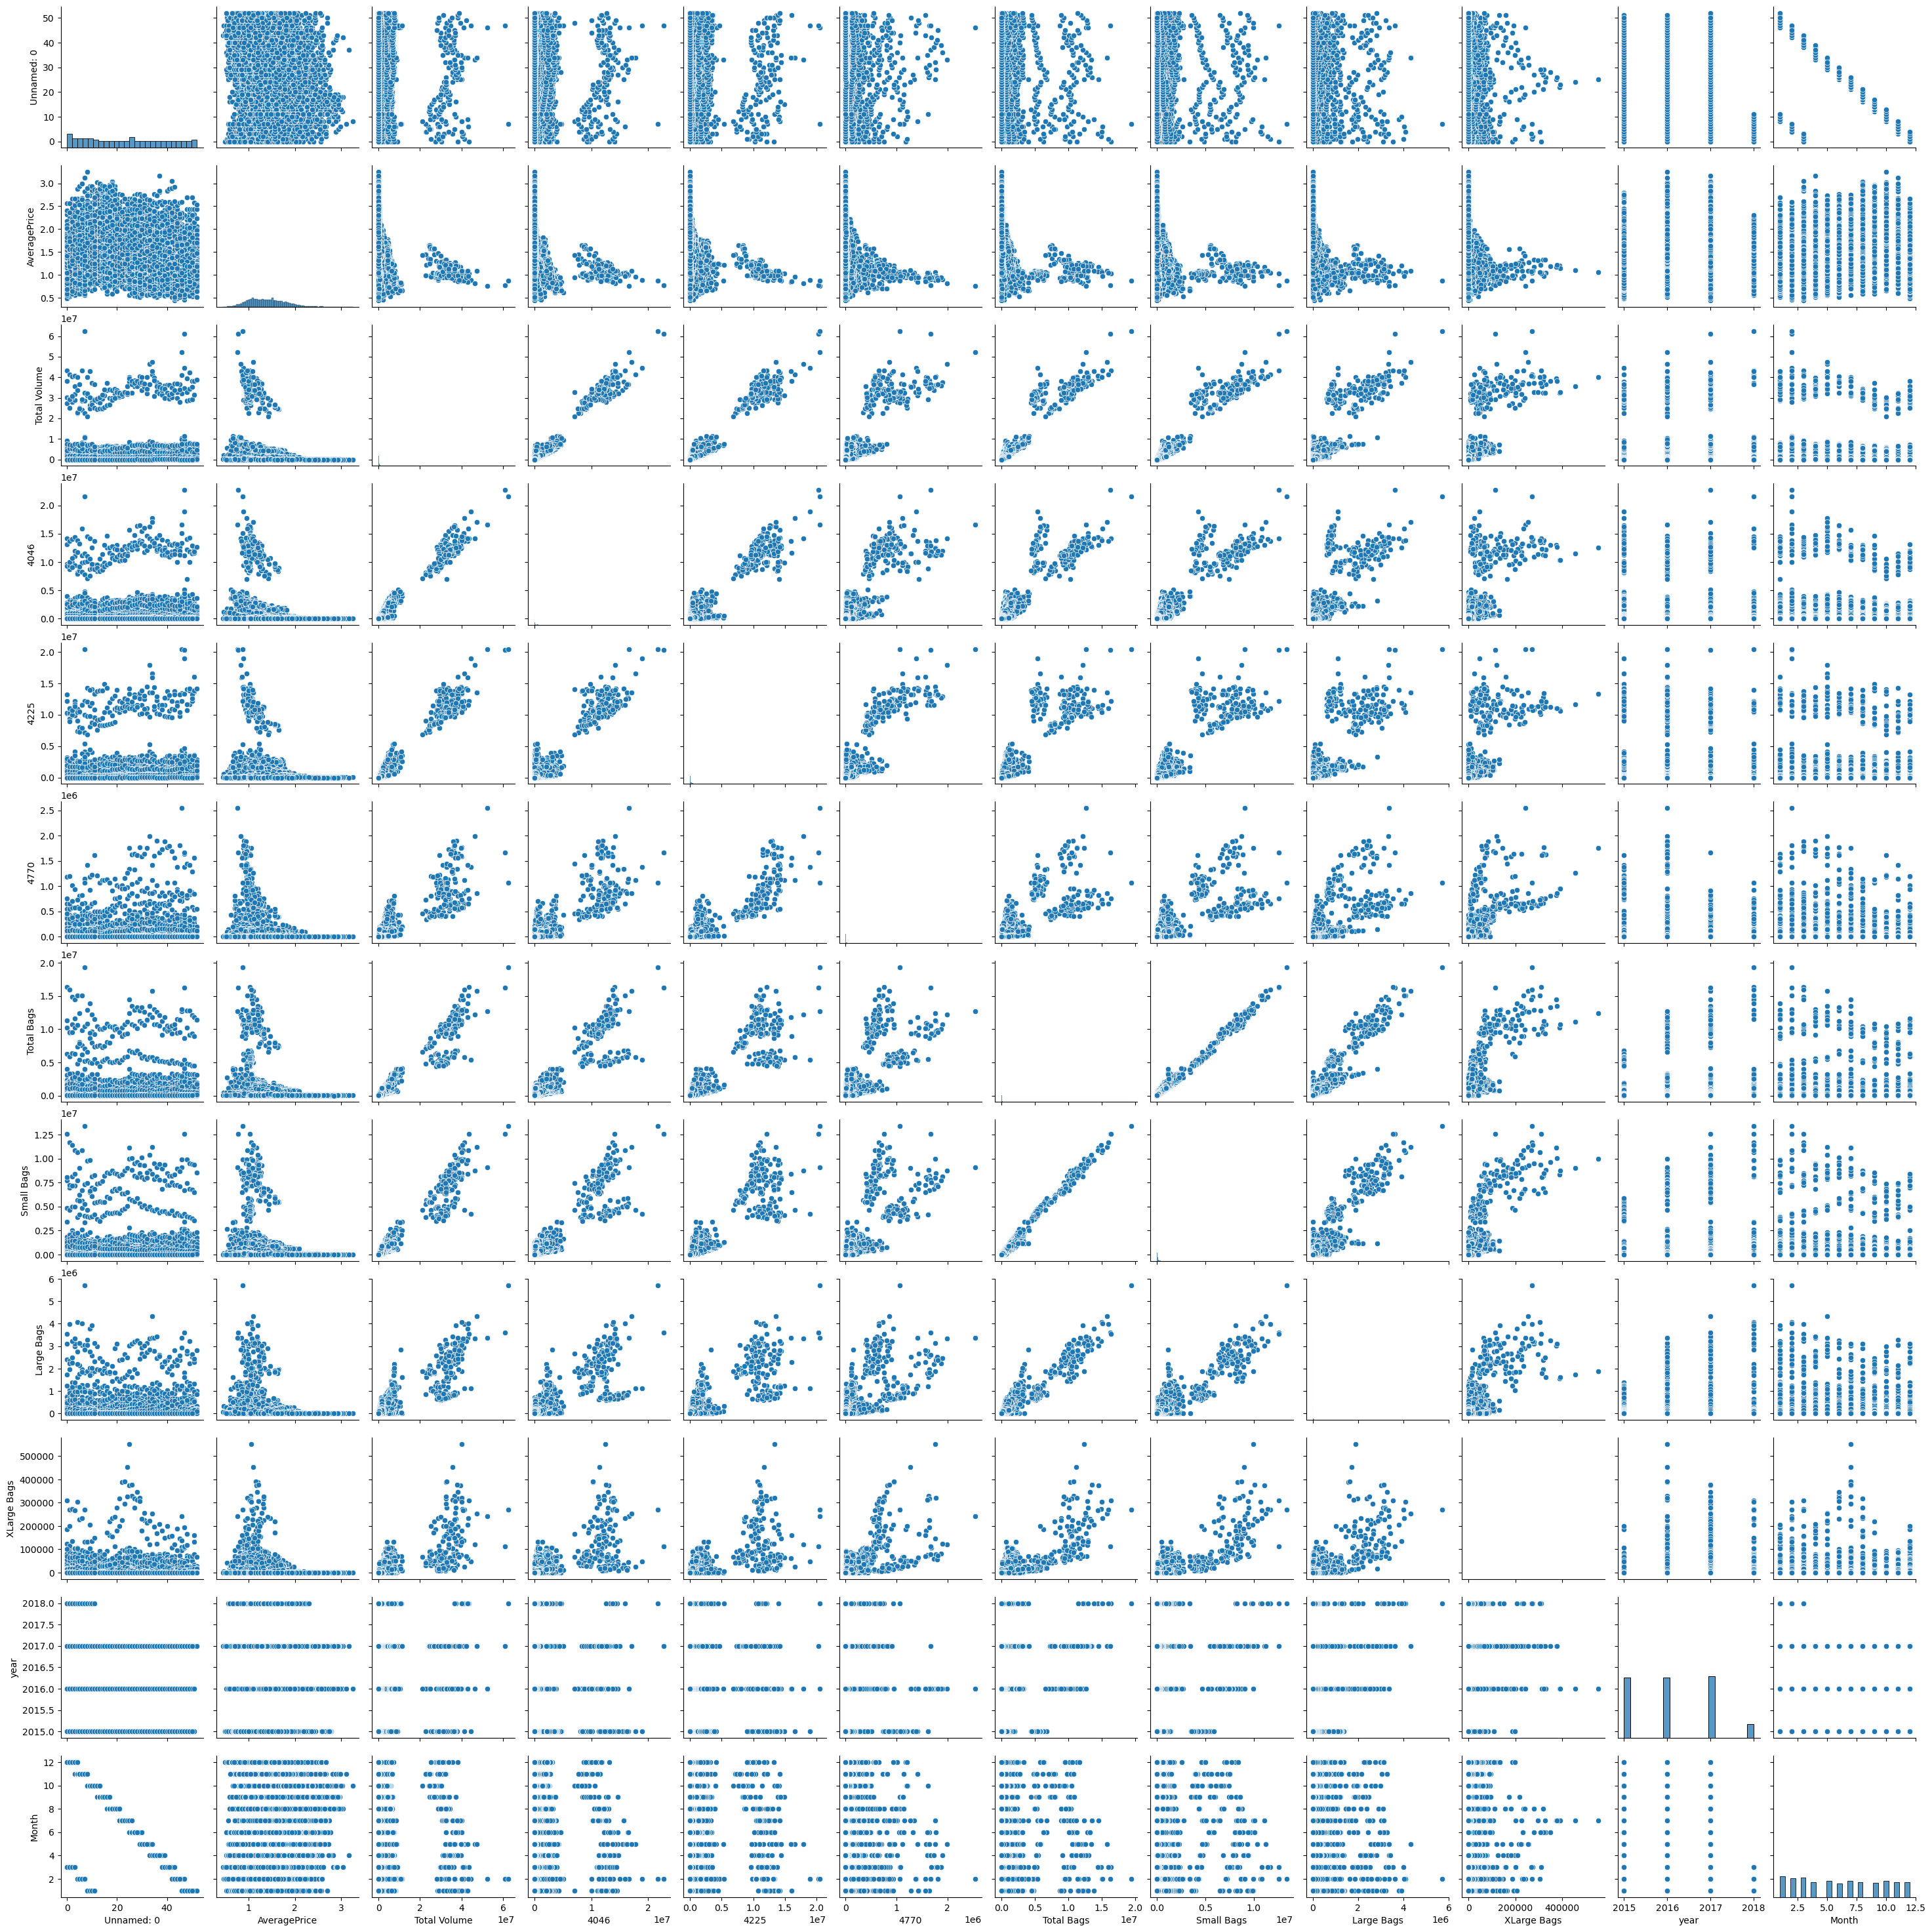

In [115]:
sns.pairplot(df)

In [110]:
df[Cont].skew()

Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

Usually, it's a great way to use 'sqrt' to remove skewness.

In [114]:
np.sqrt(df[Cont]).skew()

Total Volume    3.986597
4046            3.952972
4225            3.896355
4770            4.128605
Total Bags      4.128864
Small Bags      4.035940
Large Bags      4.134963
XLarge Bags     4.827368
dtype: float64

It works! But... still skewed....

In [113]:
(df[Cont]**(1/6)).skew()

Total Volume    0.950027
4046            0.850203
4225            0.717992
4770            0.605972
Total Bags      0.890696
Small Bags      0.690221
Large Bags      0.316832
XLarge Bags     1.377477
dtype: float64

Now we use 6th root, now its better.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  Month         18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [ ]:
df.columns

Unnamed: 0         AxesSubplot(0.125,0.53;0.110714x0.35)
AveragePrice    AxesSubplot(0.257857,0.53;0.110714x0.35)
Total Volume    AxesSubplot(0.390714,0.53;0.110714x0.35)
4046            AxesSubplot(0.523571,0.53;0.110714x0.35)
4225            AxesSubplot(0.656429,0.53;0.110714x0.35)
4770            AxesSubplot(0.789286,0.53;0.110714x0.35)
Total Bags         AxesSubplot(0.125,0.11;0.110714x0.35)
Small Bags      AxesSubplot(0.257857,0.11;0.110714x0.35)
Large Bags      AxesSubplot(0.390714,0.11;0.110714x0.35)
XLarge Bags     AxesSubplot(0.523571,0.11;0.110714x0.35)
year            AxesSubplot(0.656429,0.11;0.110714x0.35)
Month           AxesSubplot(0.789286,0.11;0.110714x0.35)
dtype: object

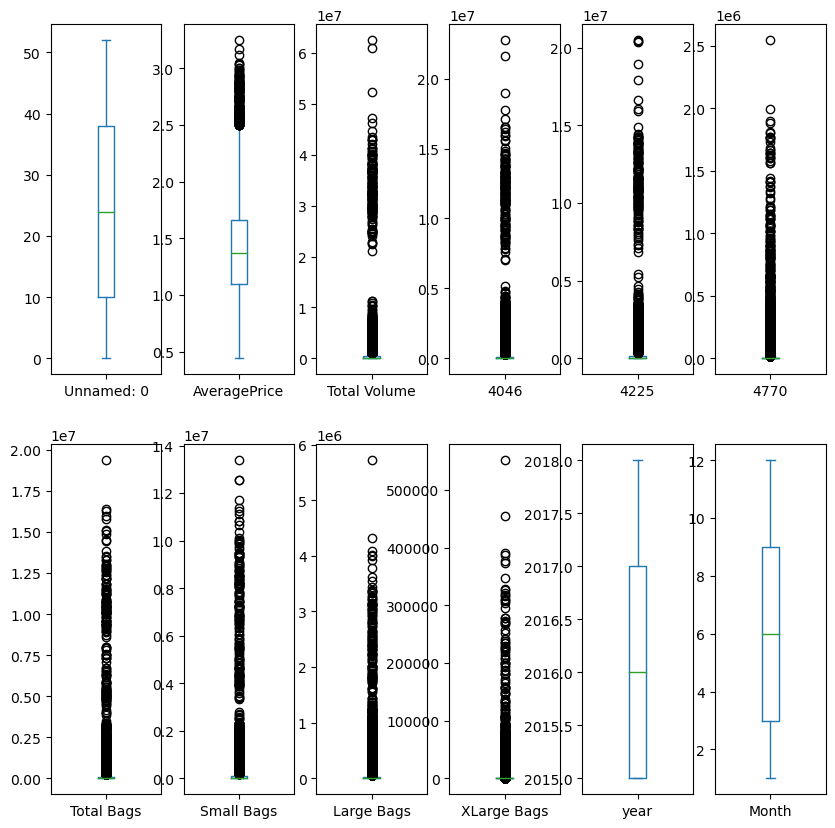

In [96]:
df.plot(kind = 'box', subplots = True, layout = (2,6), figsize=(10,10))

There are a large number of outliers present in all the features that is needed to be removed.

# Bivariate Analysis

<AxesSubplot:xlabel='year', ylabel='region'>

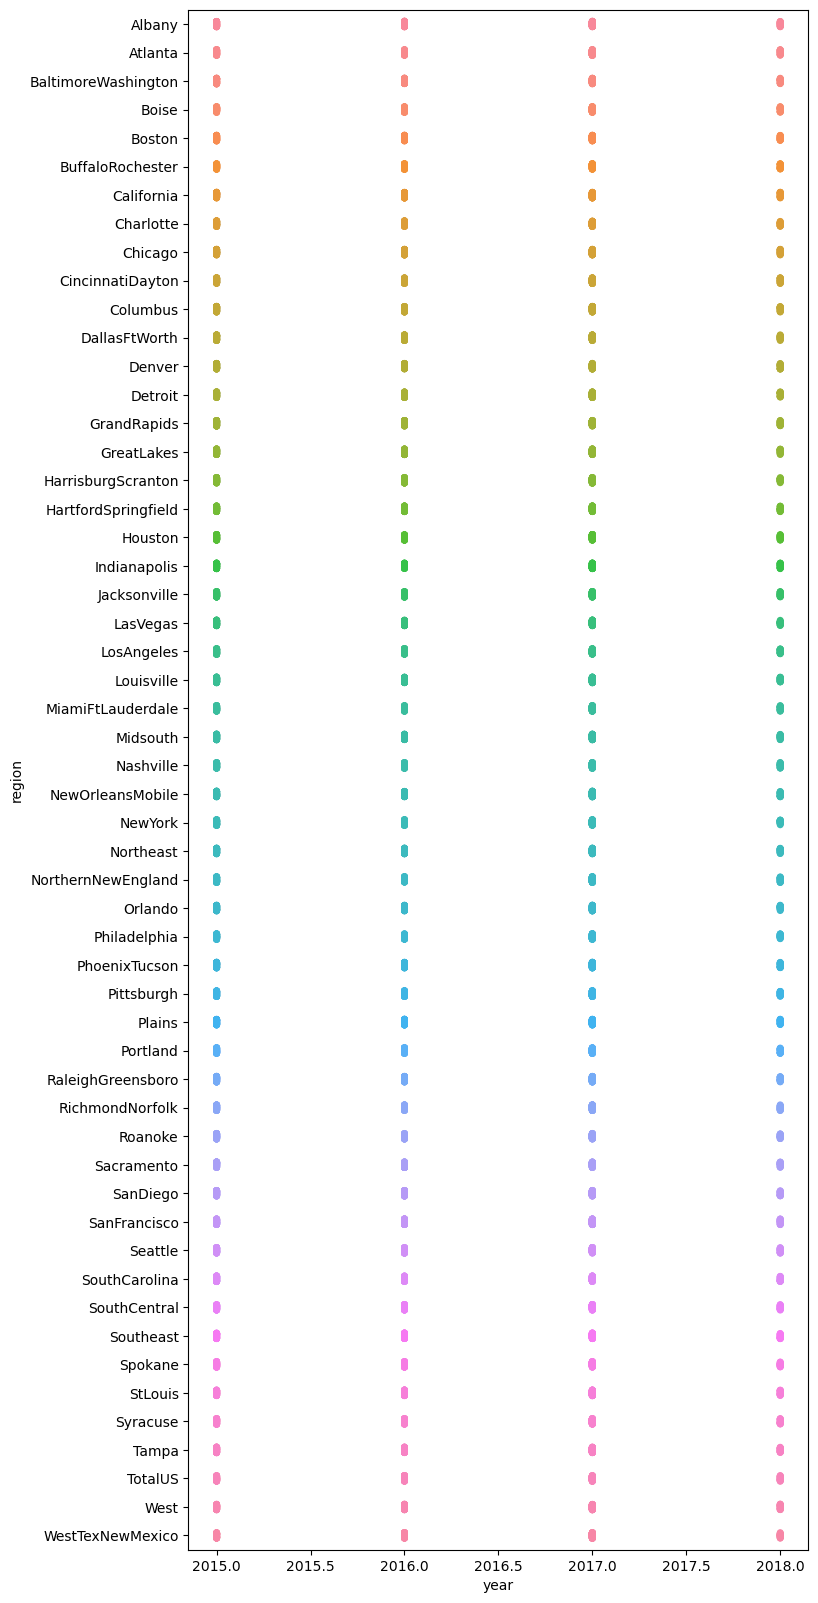

In [52]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year', y='region', data=df)

Avocados are collected from all the regions irrespective of the year. For each year avocados are collected from all the same regions.

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

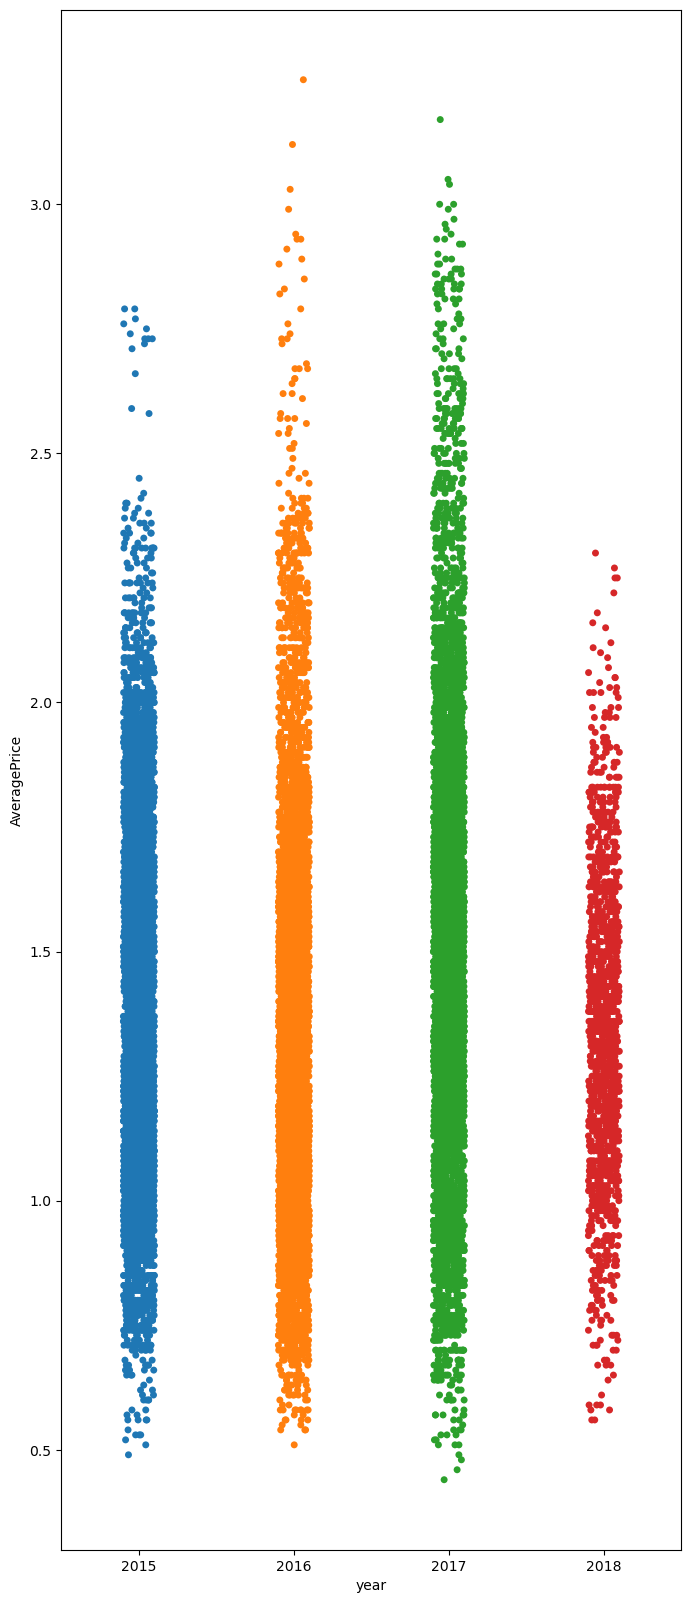

In [53]:
plt.figure(figsize=(8,20))
sns.stripplot(x='year', y='AveragePrice', data=df)

Average price is highest in the year 2016, but relatively price seem to increase as the time passes except for the year 2018 which is an exception.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

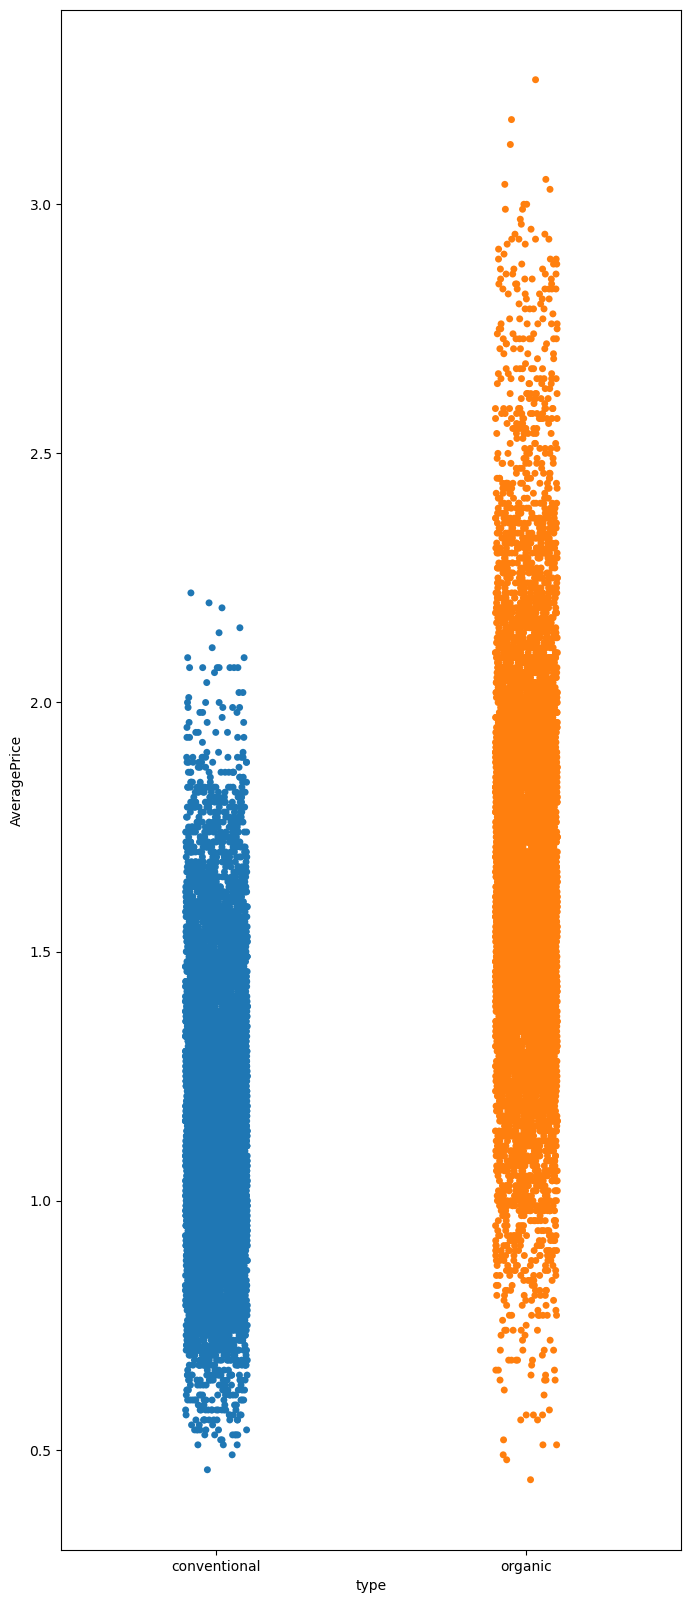

In [54]:
plt.figure(figsize=(8,20))
sns.stripplot(x='type', y='AveragePrice', data=df)

Organic Avacoados are more expensive than the conventional ones.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

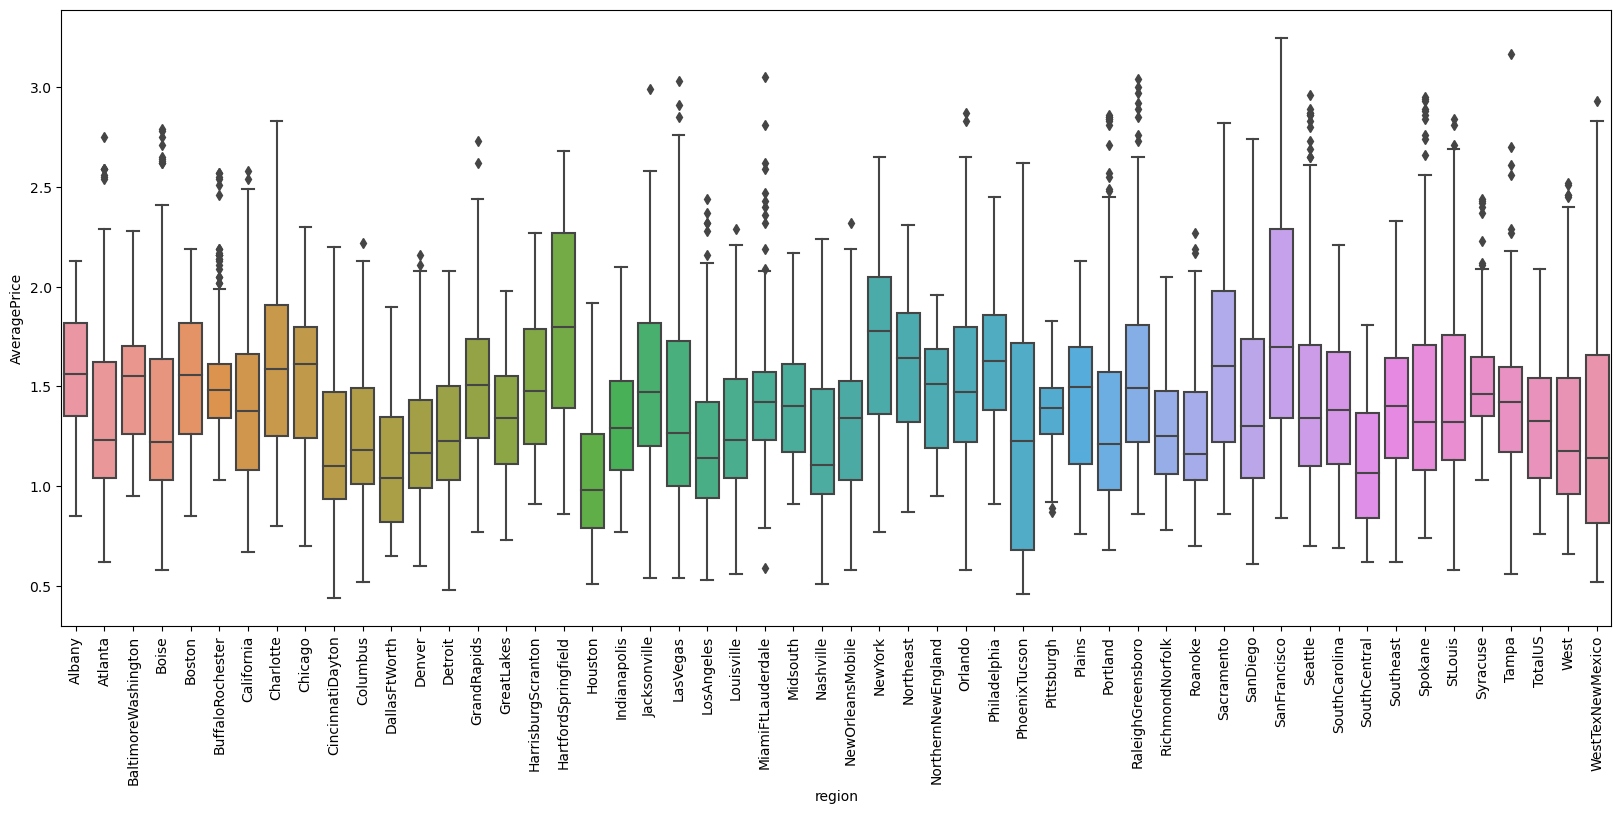

In [56]:
plt.figure(figsize=(20,8))
sns.boxplot(x='region', y= 'AveragePrice', data = df)
plt.xticks(rotation = 90)

Highest average price for avacaodo's were in San diego, Las vegas and cahrlotte regions while the least was from phoenix tucson. It is also to be noted that highest average price belong from areas where there is more development.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

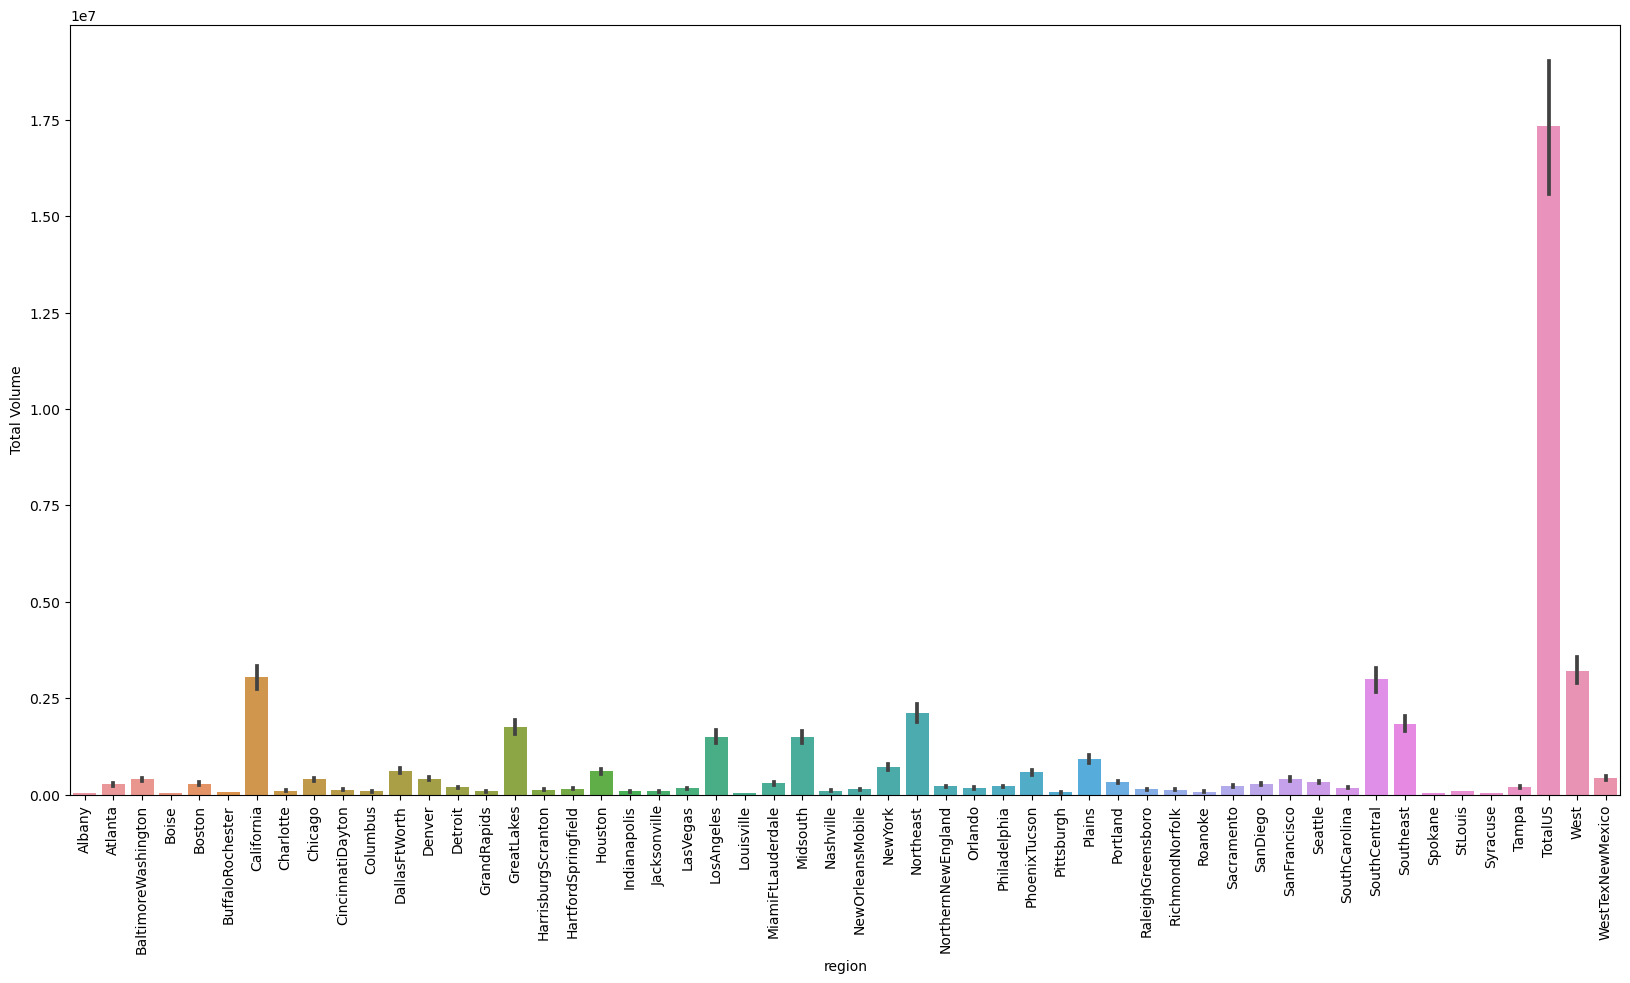

In [67]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y = 'Total Volume', data=df)
plt.xticks(rotation=90)

Highest volumes of avacado's are found in the US. That could be the reason price of avacado's low there. As supply increases price decreases,whereas region with less volume such as las vegas have the highest price of avacado'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Albany'),
  Text(1, 0, 'Atlanta'),
  Text(2, 0, 'BaltimoreWashington'),
  Text(3, 0, 'Boise'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'BuffaloRochester'),
  Text(6, 0, 'California'),
  Text(7, 0, 'Charlotte'),
  Text(8, 0, 'Chicago'),
  Text(9, 0, 'CincinnatiDayton'),
  Text(10, 0, 'Columbus'),
  Text(11, 0, 'DallasFtWorth'),
  Text(12, 0, 'Denver'),
  Text(13, 0, 'Detroit'),
  Text(14, 0, 'GrandRapids'),
  Text(15, 0, 'GreatLakes'),
  Text(16, 0, 'HarrisburgScranton'),
  Text(17, 0, 'HartfordSpringfield'),
  Text(18, 0, 'Houston'),
  Text(19, 0, 'Indianapolis'),
  Text(20, 0, 'Jacksonville'),
  Text(21, 0, 'LasVegas'),
  Text(22, 0, 'LosAngeles'),
  Text(23, 0, 'Louisville'),
  Text(24, 0, 'MiamiFtLauderdale'),
  Text(25, 0, 'M

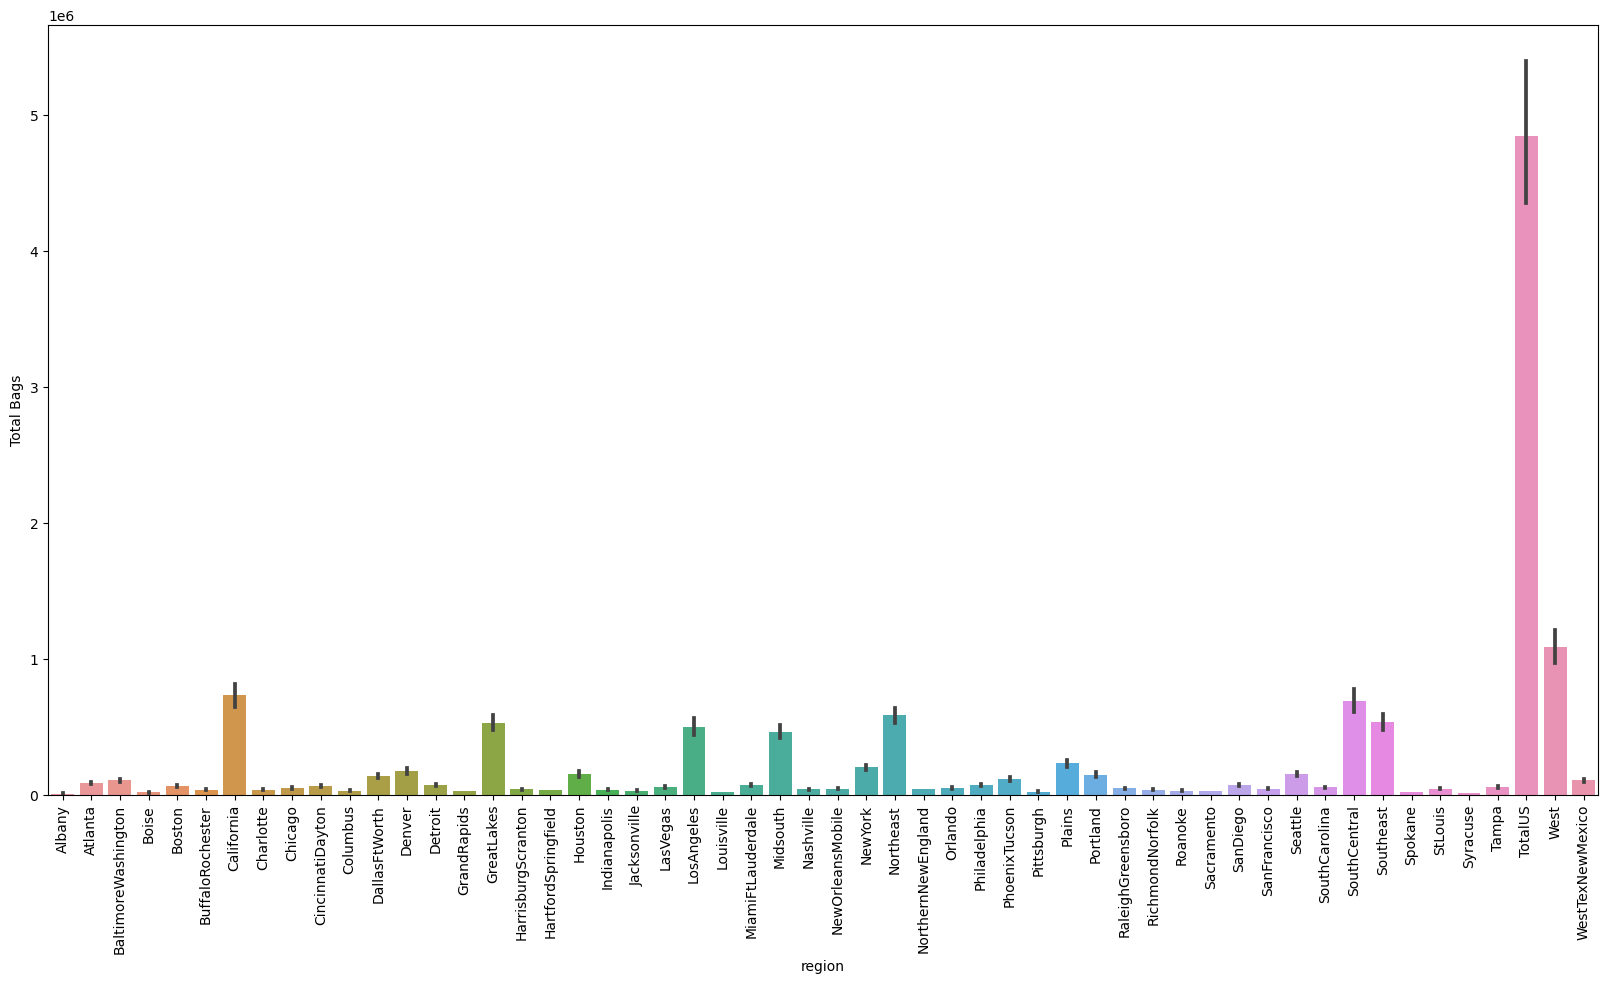

In [68]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y = 'Total Bags', data=df)
plt.xticks(rotation=90)

Data is similar to the previous bar chart, as the volumes of avacado increases in a region, total bags also increases to carry those avacado's.

# Multivariate Analysis

In [79]:

import plotly.express as px

data = df.groupby(['AveragePrice', 'year']).apply(lambda x:x['Total Volume'].count()).reset_index(name='Volume')
px.line(data, x= 'AveragePrice', y = 'Volume', color = 'year', title = 'Average Price of Avacados by Volume of year 2015 and 2016')

Average price of avacado's for the year 2016 was way more than any other year, but highest volumes of avacado's were produced in 2015,reaching to a mark of 85, after that the produce of avocados seem to decrease. It is also to be noted that high volumes of avocados are sold at lower average price.

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

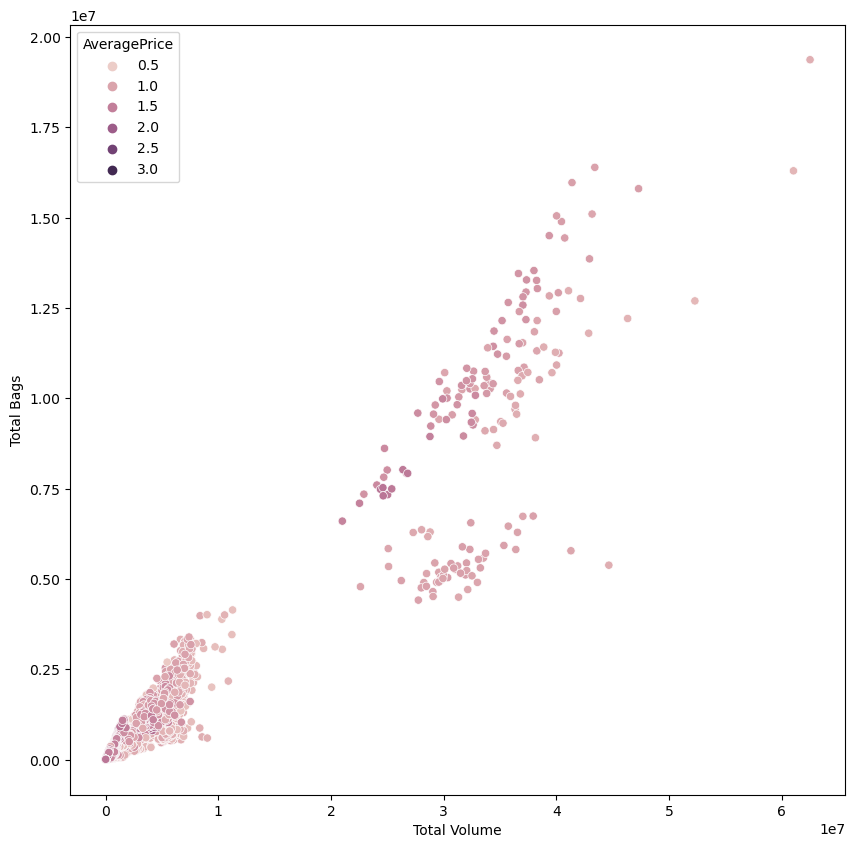

In [80]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Total Volume', y= 'Total Bags', hue= 'AveragePrice', data = df)

As the total volume increases, Total bags also increases to carry it but the average price seem to decrease. When the volumes of avacados are low average price increases of avacados.

<AxesSubplot:xlabel='Total Bags', ylabel='4225'>

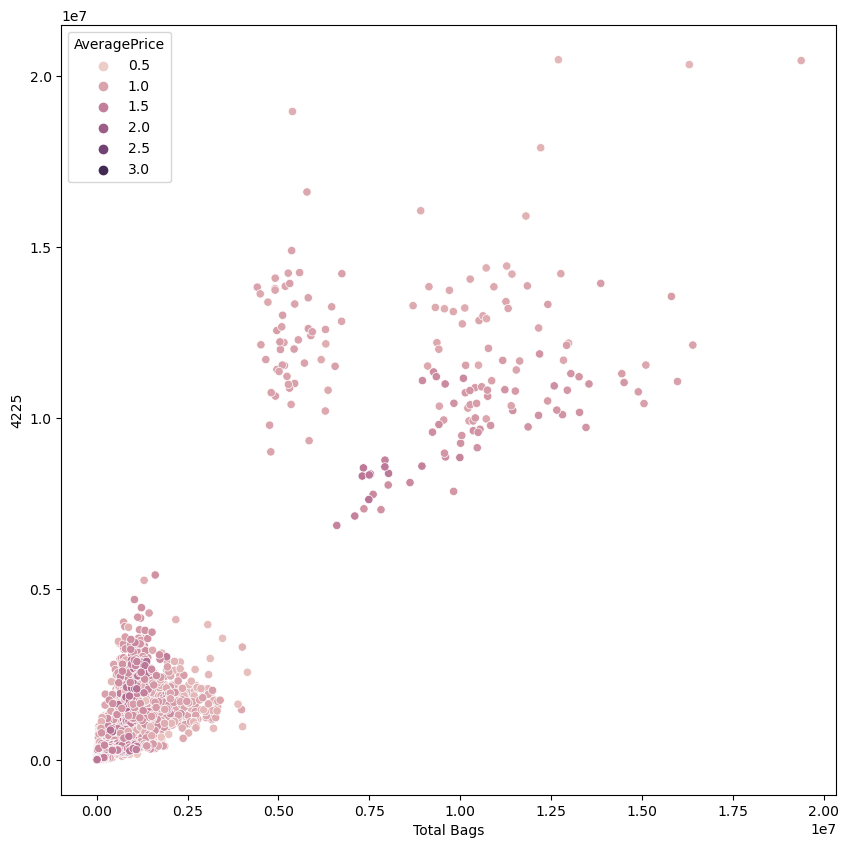

In [86]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'Total Bags', y= '4225', hue= 'AveragePrice', data = df)

As PlU's increases so does the no. of total bags but as we know if supply of something increases its price decreases. Same thing can be seen here.

In [64]:
dfcor = df.corr()
dfcor

Unnamed: 0  AveragePrice  Total Volume      4046      4225  \
Unnamed: 0      1.000000     -0.133008      0.014035  0.017628  0.019829   
AveragePrice   -0.133008      1.000000     -0.192752 -0.208317 -0.172928   
Total Volume    0.014035     -0.192752      1.000000  0.977863  0.974181   
4046            0.017628     -0.208317      0.977863  1.000000  0.926110   
4225            0.019829     -0.172928      0.974181  0.926110  1.000000   
4770            0.041752     -0.179446      0.872202  0.833389  0.887855   
Total Bags     -0.002219     -0.177088      0.963047  0.920057  0.905787   
Small Bags      0.000347     -0.174730      0.967238  0.925280  0.916031   
Large Bags     -0.009196     -0.172940      0.880640  0.838645  0.810015   
XLarge Bags    -0.011546     -0.117592      0.747157  0.699377  0.688809   
year           -0.171667      0.093197      0.017193  0.003353 -0.009559   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Unnamed: 0    0.041752   -0.002219    0.000347   -0.009196    -0.011546   
AveragePrice -0.179446   -0.177088   -0.174730   -0.172940    -0.117592   
Total Volume  0.872202    0.963047    0.967238    0.880640     0.747157   
4046          0.833389    0.920057    0.925280    0.838645     0.699377   
4225          0.887855    0.905787    0.916031    0.810015     0.688809   
4770          1.000000    0.792314    0.802733    0.698471     0.679861   
Total Bags    0.792314    1.000000    0.994335    0.943009     0.804233   
Small Bags    0.802733    0.994335    1.000000    0.902589     0.806845   
Large Bags    0.698471    0.943009    0.902589    1.000000     0.710858   
XLarge Bags   0.679861    0.804233    0.806845    0.710858     1.000000   
year         -0.036531    0.071552    0.063915    0.087891     0.081033   

                  year  
Unnamed: 0   -0.171667  
AveragePrice  0.093197  
Total Volume  0.017193  
4046          0.003353  
4225         -0.009559  
4770         -0.036531  
Total Bags    0.071552  
Small Bags    0.063915  
Large Bags    0.087891  
XLarge Bags   0.081033  
year          1.000000

<AxesSubplot:>

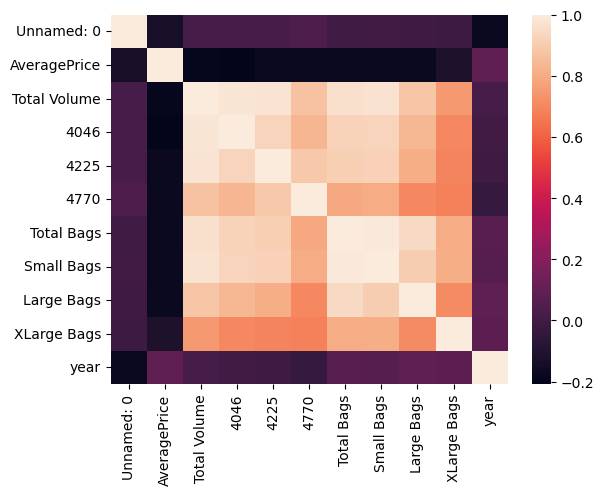

In [65]:
sns.heatmap(dfcor)

Average price shows positive relationship with the year column while negative correlation with all the other column. Intresting thing to notice here is that independent features show more than 90% correlation with each other. This is a case of multicollinearity. We need to remove some features to resolve this problem.

<AxesSubplot:>

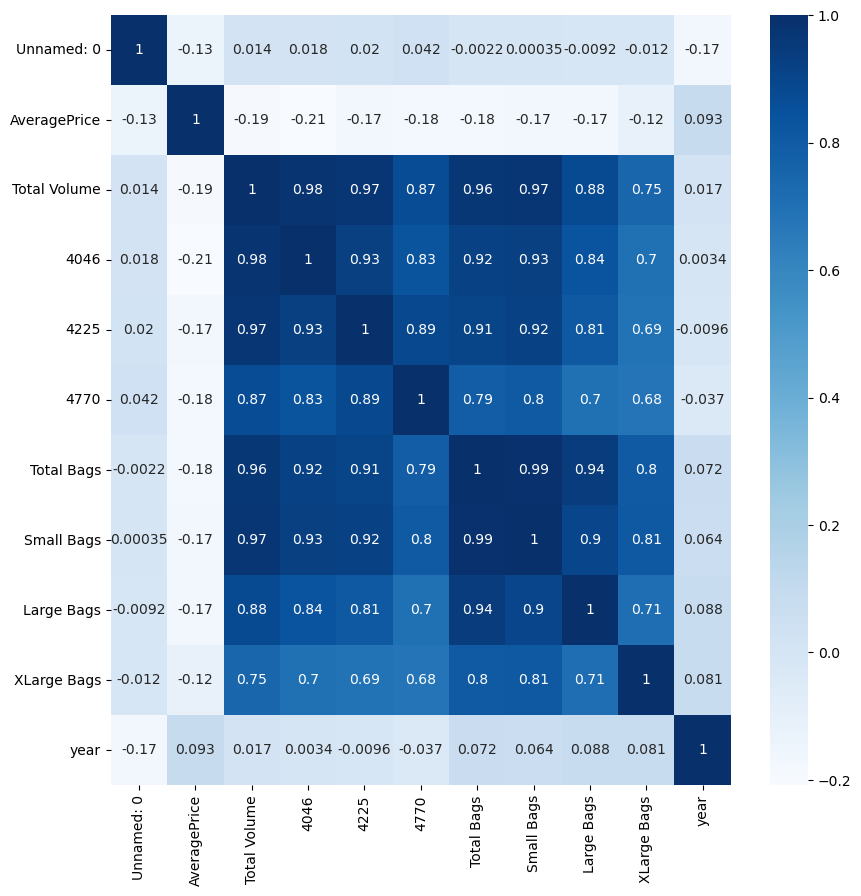

In [82]:
plt.figure(figsize=(10,10))
sns.heatmap(dfcor, cmap= "Blues", annot = True)

In [83]:
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [84]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# Feature Engineering

#Removing identifier and constant columns

In [85]:
df.drop('Unnamed: 0', axis = 1)

Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()

In [ ]:
df['type']= label.fit_transform(df['type'])
df['region'] = label.fit_transform(df['region'])

Get month from Date and drop the column

In [89]:
#Converting date column into datetime format
df['Month'] = pd.to_datetime(df['Date']).dt.month
df.drop('Date', axis=1, inplace= True)

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

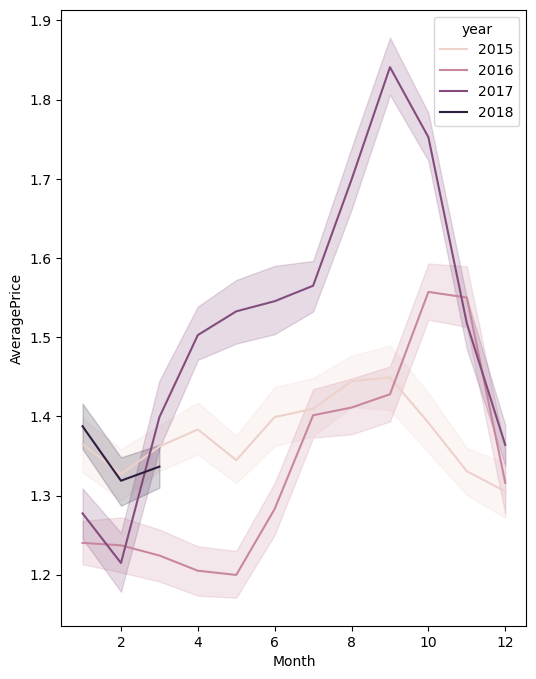

In [92]:
plt.figure(figsize=(6,8))
sns.lineplot(x = 'Month', y='AveragePrice', hue = 'year', data = df )

Average price of avacado's is high in the month of September October November. As the season for avocado's is in the summer, off season fruit is expensive. We have data for year 2018 till march only

In [95]:
#Removing Outliers: 
from scipy.stats import zscore
z=np.abs(zscore(df))
threhold(z,df)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

# Modeling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [ ]:
X = df.drop('AveragePrice', axis =1)
y = df['AveragePrice']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_test,X_train,y_test,y_train = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [ ]:
X_test.shape

In [ ]:
y_test.shape

In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [ ]:
mse= mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print('r2 score:', r2)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

In [ ]:
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print("Ridge Regression Mean Squared Error:", ridge_mse)

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 42)

In [ ]:
gb_model.fit(X_train,y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test,gb_y_pred)
print("Gradient Boosting Mean Square Error:", gb_mse)


In [ ]:
KN_model = KNeighborsRegressor()
KN_model.fit(X_train,y_train)
KN_y_pred = KN_model.predict(X_test)
KN_mse = mean_squared_error(y_test,KN_y_pred)
print("KNeighbors Regressor:", KN_mse)



In [ ]:
rf_model = RandomForestRegressor(n_estimators= 100, random_state=42)

In [ ]:
rf_model.fit(X_train,y_train)
rf_y_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test,rf_y_pred)
print("Random Forest Regressor:", rf_mse)


In [ ]:
dt_model = DecisionTreeRegressor()

In [ ]:
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test,dt_y_pred)
print('Decision Tree Regressor:', dt_mse)

In [ ]:
from sklearn.model_selection import GridSearchCV
Models = []
Scores = []


Ridge

In [ ]:
param_grid = {'alpha': [0.0001, 0.001,0.01,0.1,1,10,100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test,y_test)

print("Test score:", ridge_score)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

print("Best Estimator:", best_estimator)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



# Gradient Boost 

In [ ]:
param_grid = {'max_depth': [3,4,5], 'n_estimators': [100,200,300]}
gb_model = GradientBoostingRegressor()

grid_search = GridSearchCV(gb_model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test,y_test)

print("Test score:", gb_score)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

print("Best Estimator:", best_estimator)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# K-Nearest Neighbors 

In [ ]:
param_grid = {'n_neighbors' : range(1,20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
KN_score = grid_search.score(X_test,y_test)

print("Test score:", KN_score)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

print("Best Estimator:", best_estimator)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# RandomForestRegressor

In [ ]:
param_grid = {'max_depth' : [5,10,15,20,25,30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
KN_score = grid_search.score(X_test,y_test)

print("Test score:", KN_score)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

print("Best Estimator:", best_estimator)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# DecisionTreeRegressor

In [ ]:
param_grid = {'max_depth' : range (2,20), 'min_samples_leaf': range(2,10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv = 5)
grid_search.fit(X_train, y_train)
KN_score = grid_search.score(X_test,y_test)

print("Test score:", KN_score)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_estimator.predict(X_test)

print("Best Estimator:", best_estimator)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Result:

In [ ]:
df_result = pd.DataFrame({'Model': Models, 'Score': Scores})
df_result